In [67]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')
testdata=pd.read_csv('test.csv')
# Preprocess the data
titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_data.fillna(titanic_data.mean(), inplace=True)

testdata.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
testdata['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
testdata['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
testdata.fillna(titanic_data.mean(), inplace=True)

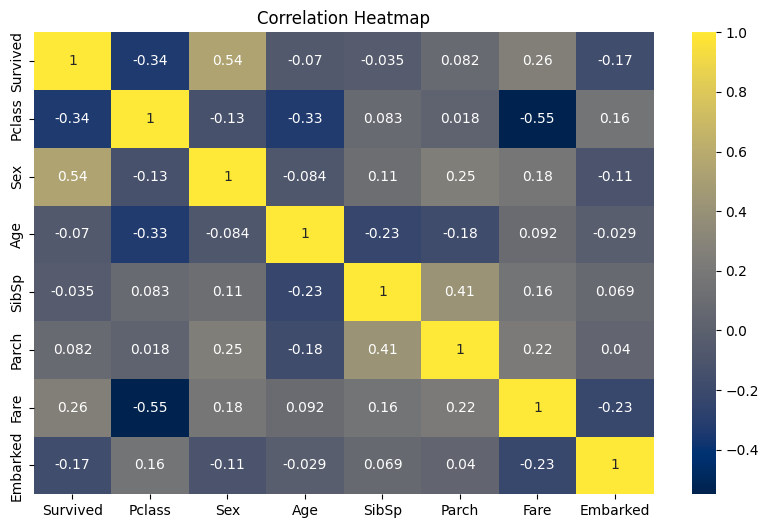

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.corr(), annot=True, cmap='cividis')
plt.title('Correlation Heatmap')
plt.show()


In [69]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split the data into features and target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [70]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Cross-validation scores: [0.78321678 0.78321678 0.8028169  0.78169014 0.80985915]
Mean CV accuracy: 0.7921599527233331
Best parameters: {'max_depth': 5, 'n_estimators': 50}


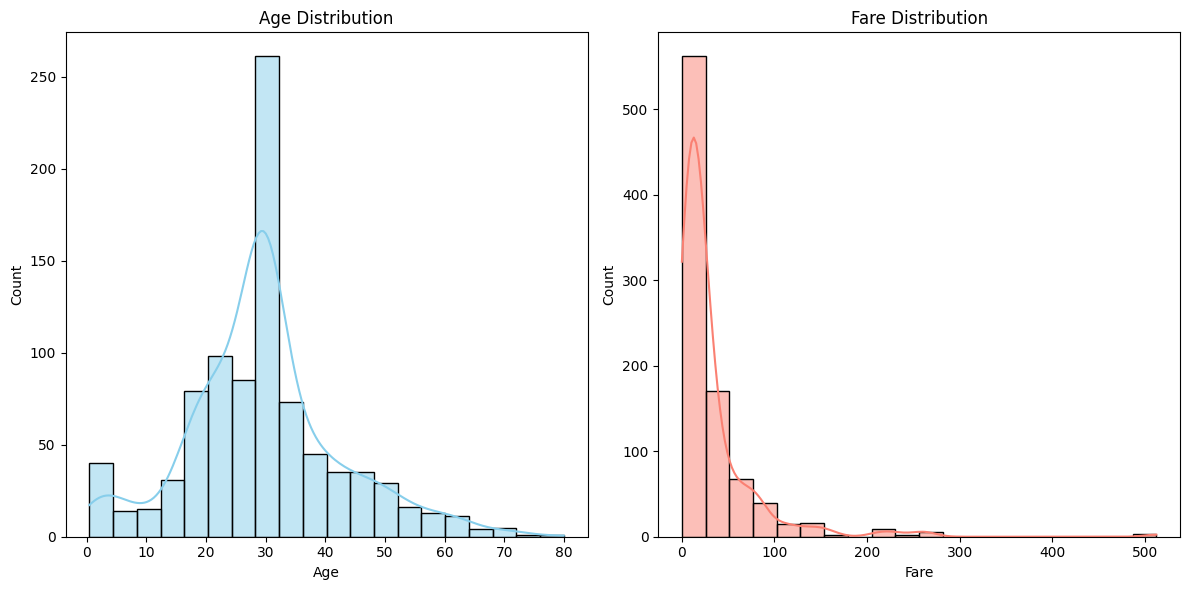

In [71]:
import numpy as np
# Distribution plots for 'Age' and 'Fare'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

plt.subplot(1, 2, 2)
sns.histplot(titanic_data['Fare'], bins=20, kde=True, color='salmon')
plt.title('Fare Distribution')
plt.xlabel('Fare')

plt.tight_layout()
plt.show()


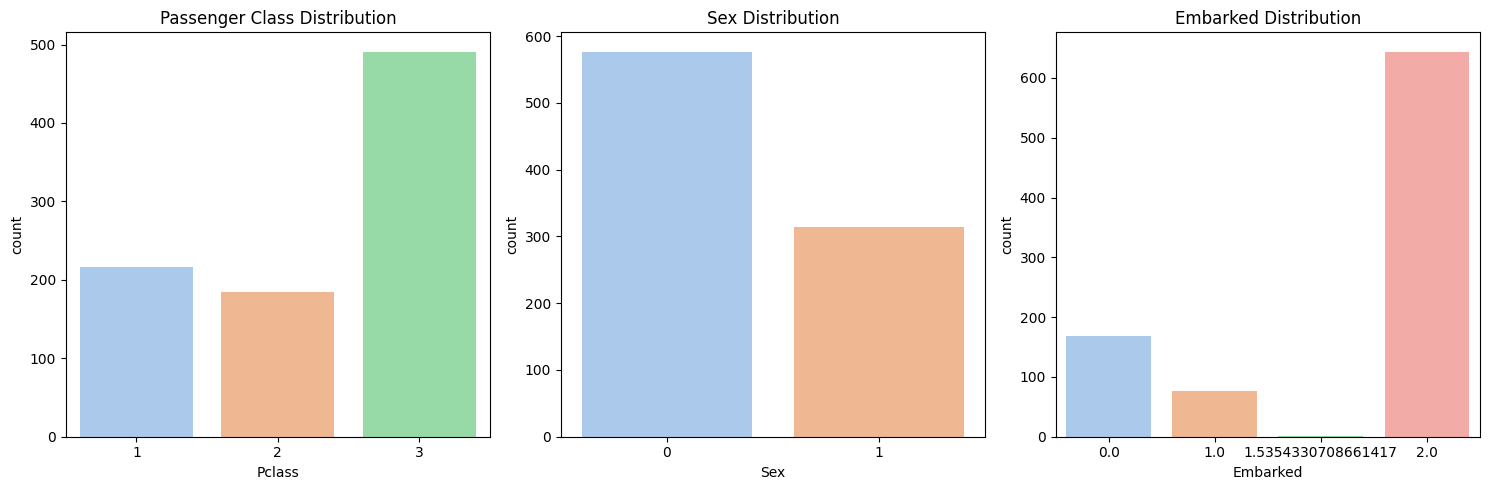

In [72]:
# Count plots for categorical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', hue='Pclass',data=titanic_data,palette='pastel',legend=False)
plt.title('Passenger Class Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Sex', hue='Sex',data=titanic_data,palette='pastel',legend=False)
plt.title('Sex Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', hue='Embarked',data=titanic_data,palette='pastel',legend=False)
plt.title('Embarked Distribution')

plt.tight_layout()
plt.show()

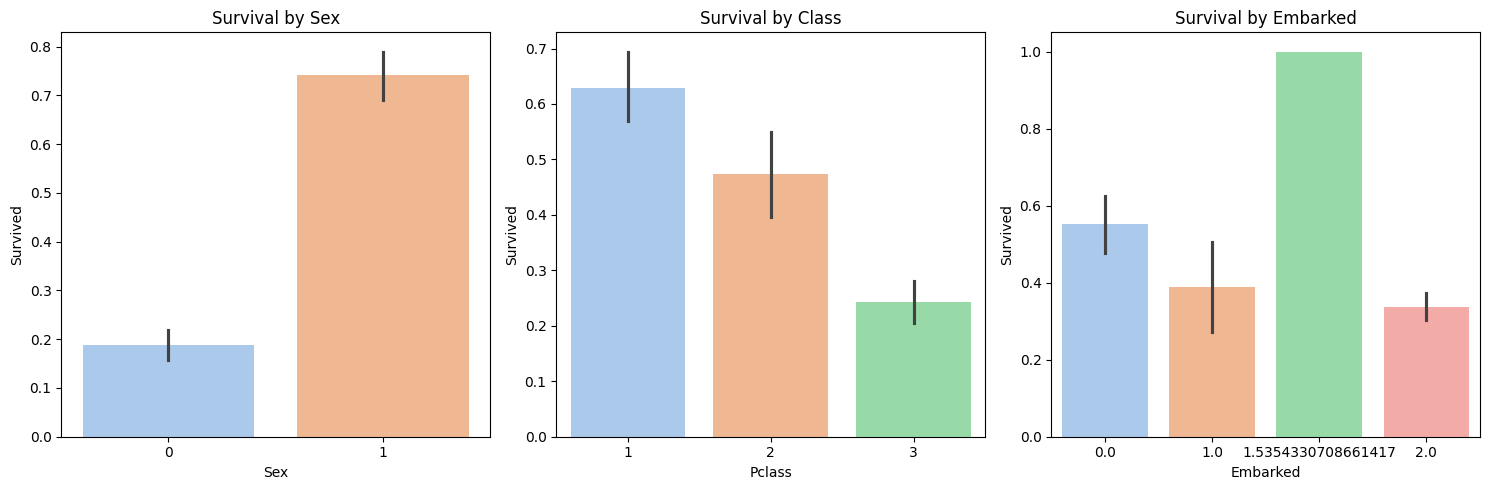

In [73]:
# Survival analysis by features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Sex', y='Survived',hue='Sex', data=titanic_data,palette='pastel',legend=False)
plt.title('Survival by Sex')

plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived',hue='Pclass',data=titanic_data, palette='pastel',legend=False)
plt.title('Survival by Class')

plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived',hue='Embarked', data=titanic_data, palette='pastel',legend=False)
plt.title('Survival by Embarked')

plt.tight_layout()
plt.show()

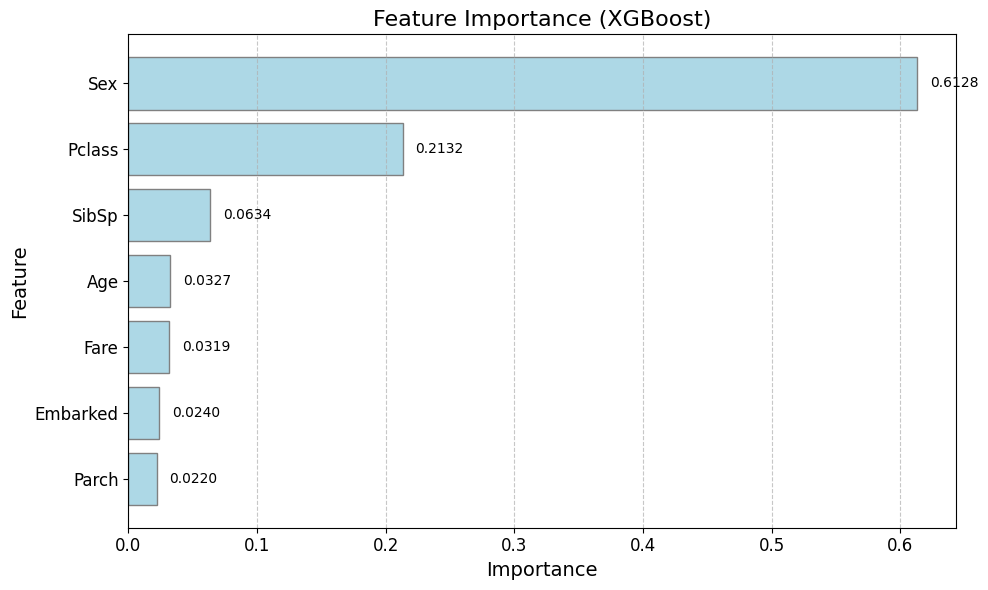

Test accuracy: 0.8268156424581006


In [74]:
best_xgb_model = grid_search.best_estimator_
feature_importance = best_xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='lightblue', edgecolor='grey')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx], fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance (XGBoost)', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding feature importance values to the graph
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v + 0.01, i, f'{v:.4f}', fontsize=10, color='black', va='center')

plt.tight_layout()
plt.show()

test_accuracy = best_xgb_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


In [75]:
from sklearn.metrics import classification_report

# # Classification report
y_pred = best_xgb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


y_pred = best_xgb_model.predict(testdata)

# Add the predicted labels to the test data DataFrame
testdata['Survived'] = y_pred

# Write the DataFrame to a CSV file
testdata.to_csv('predicted_survived.csv', index=False)



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [76]:
combined_data = pd.concat([titanic_data, testdata], ignore_index=True)

# Split the combined data into features and target
X_combined = combined_data.drop('Survived', axis=1)
y_combined = combined_data['Survived']

# Initialize and train the XGBoost model on the combined data
combined_xgb_model = XGBClassifier(random_state=42)
combined_xgb_model.fit(X_combined, y_combined)
# Evaluate the accuracy on the combined dataset
combined_accuracy = combined_xgb_model.score(X_combined, y_combined)
print("Combined dataset accuracy:", combined_accuracy)


Combined dataset accuracy: 0.975553857906799
